<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Iris.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Livecoding: Iris Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Multiclass classification | Identify a flower's class |

## Instructions with NBGrader removed

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## About the dataset

[Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a well-known multiclass dataset. It contains 3 classes of flowers with 50 examples each. There are a total of 4 features for each flower.

![](./classic-datasets/images/Iris-versicolor-21_1.jpg)

## Package setups

In [1]:
#to debug package errors
import sys
sys.path
sys.executable

'/home/jan/anaconda3/envs/DeepLearning/bin/python'

In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data

In [2]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target
df_iris['class'] = dataset.target_names[dataset.target]
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


### Question
Find the X and y values we're looking for. Notice that y is categorical and thus, we could **one-hot encode it** if we are looking at **class** or we can just pick **target**. In order to one hot encode we have  to re-shape `y` it using the **.get_dummies** function. 

## For the purpose of this exercise, do not use hot encoding, go only for target but think about if you have to drop it somewhere or not...

In [7]:
# YOUR CODE HERE
data_filt = df_iris.drop(["target", "class"], axis=1)
X = data_filt
y = df_iris["target"]

y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Step 2: Normalize the data in X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Question

Is it better to store it on numpy or in an updated pandas dataframe? Numpy is more efficient while pandas is more visual. **pick whatever your prefer**

In [9]:
X = pd.DataFrame(X_scaled)
X.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Step 3: Train / Test Split

Store training input data in a variable named `x_train` and training targets in a variable named `y_train` with an **80/20 train/test split**.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=1)

In [16]:
print(f'X_train: {X_train.shape}. y_train: {y_train.shape}')
print(f'Labels: {y_train}')
assert X_train.shape == (120,4)
# only if we hot encode
# assert y_train.shape == (120,3)

X_train: (120, 4). y_train: (120,)
Labels: 91     1
135    2
69     1
128    2
114    2
48     0
53     1
28     0
54     1
108    2
112    2
17     0
119    2
103    2
58     1
118    2
18     0
4      0
45     0
59     1
39     0
36     0
117    2
139    2
107    2
132    2
126    2
85     1
122    2
95     1
      ..
47     0
115    2
13     0
88     1
8      0
81     1
60     1
0      0
1      0
57     1
22     0
61     1
63     1
7      0
86     1
96     1
68     1
50     1
101    2
20     0
25     0
134    2
71     1
129    2
79     1
133    2
137    2
72     1
140    2
37     0
Name: target, Length: 120, dtype: int32


In [17]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 120
Number of observations in the test data: 30


## Step 4: Training a model

Train a model on the data to obtain a training accuracy > 93%. Store the training history in a variable named `history`.

For example, we can use **RandomForestClassifier** model to classify Irises. N_estimators increases model accuracy. Other options include:
- K-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifiers
- Naive Bayes
- Linear Discriminant Analysis
- Logistic Regression


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
clf = RandomForestClassifier(n_estimators = 10000).fit(X_train, y_train)

Now we can measure the accuracy with our **test set**

In [21]:
clf.score(X_test, y_test)

0.9666666666666667

And now we can predict what a new input would look like...

In [22]:
clf.predict([[3, 5, 4, 2]])

array([2])

can you build a table with each predicted value and its corresponding category in string?

In [23]:
prediction = clf.predict(X_test)

cat_pred = []

for e in prediction:
    if e == 0:
        cat_pred.append("setosa")
    elif e == 1:
        cat_pred.append("versicolor")
    else:
        cat_pred.append("virginica")
        
for j in zip(prediction, cat_pred):
    print(j)

(0, 'setosa')
(1, 'versicolor')
(1, 'versicolor')
(0, 'setosa')
(2, 'virginica')
(1, 'versicolor')
(2, 'virginica')
(0, 'setosa')
(0, 'setosa')
(2, 'virginica')
(1, 'versicolor')
(0, 'setosa')
(2, 'virginica')
(1, 'versicolor')
(1, 'versicolor')
(0, 'setosa')
(1, 'versicolor')
(1, 'versicolor')
(0, 'setosa')
(0, 'setosa')
(1, 'versicolor')
(1, 'versicolor')
(2, 'virginica')
(0, 'setosa')
(2, 'virginica')
(1, 'versicolor')
(0, 'setosa')
(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')


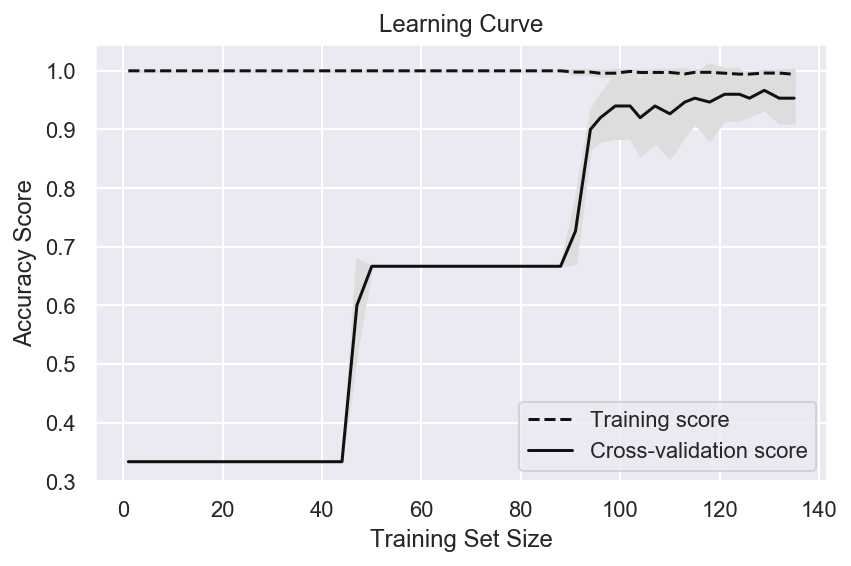

In [25]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()